# Support Vector Regression - Cement Slump Test

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/cement_slump.csv')

In [3]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


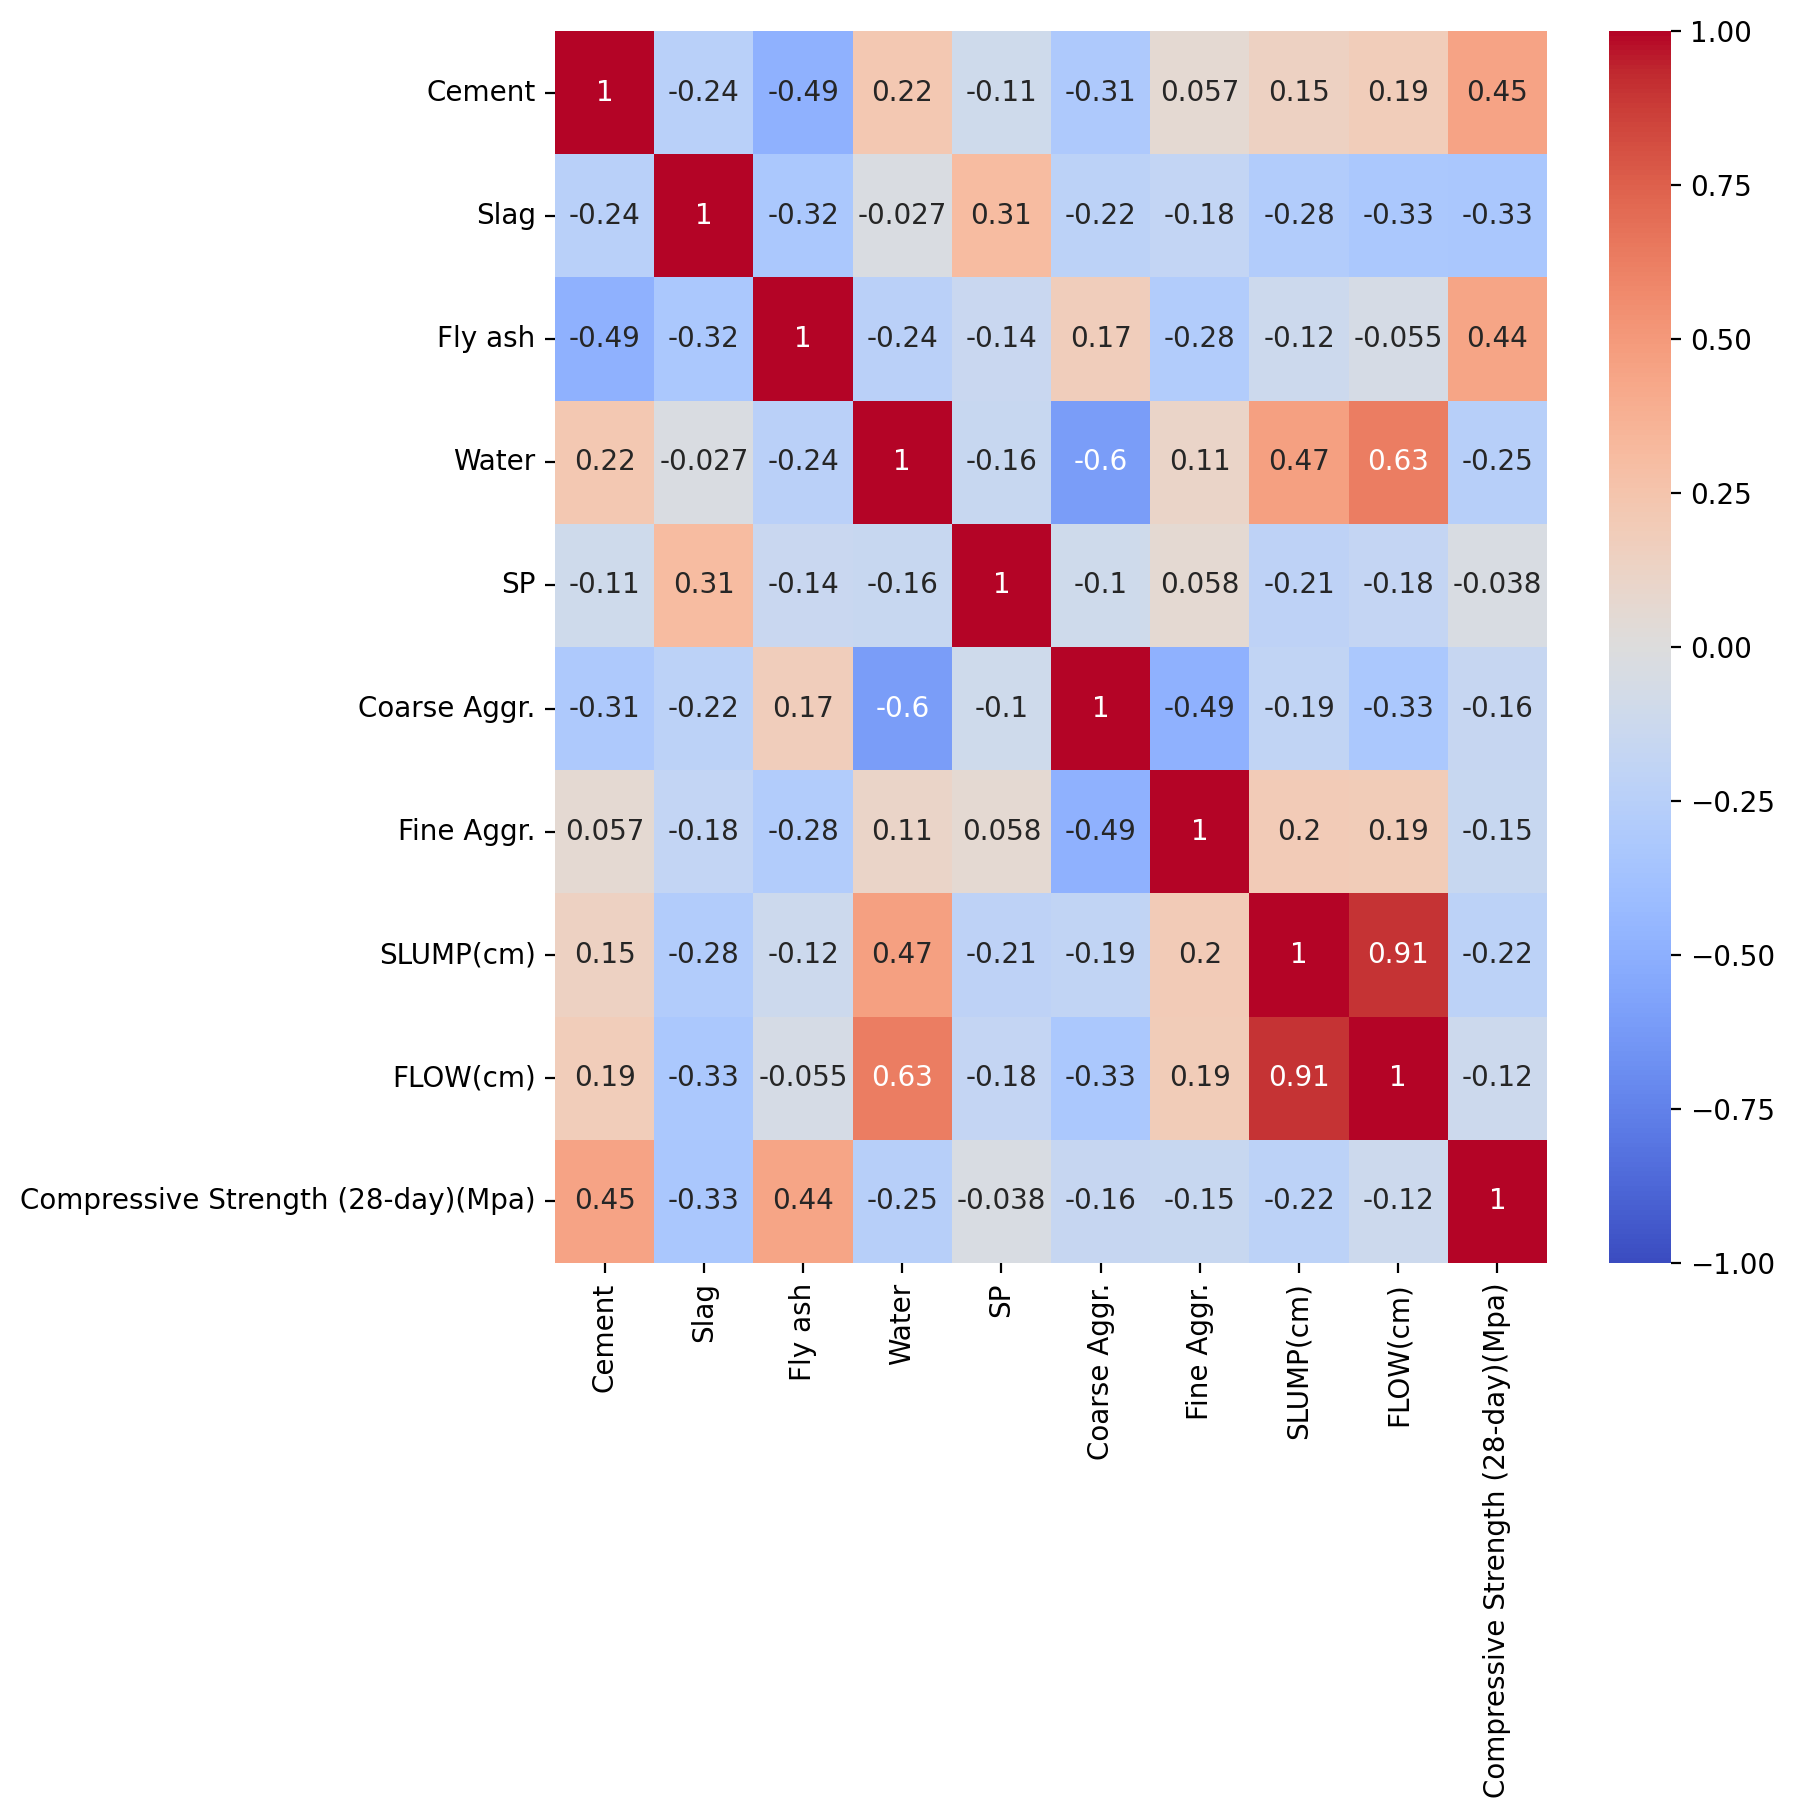

In [4]:
plt.figure(figsize=(8,8), dpi=200)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1);

In [5]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [6]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis=1)

In [7]:
y = df['Compressive Strength (28-day)(Mpa)']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
scaled_X_train = scaler.fit_transform(X_train)

In [13]:
scaled_X_test = scaler.transform(X_test)

In [15]:
from sklearn.svm import SVR, LinearSVR

In [18]:
# help(SVR)

### Base Model

In [19]:
base_model = SVR()

In [20]:
base_model.fit(scaled_X_train, y_train)

SVR()

In [21]:
base_preds = base_model.predict(scaled_X_test)

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
mean_absolute_error(y_test, base_preds)

5.236902091259179

In [24]:
np.sqrt(mean_squared_error(y_test, base_preds))

6.695914838327134

In [25]:
y_test.mean()

36.26870967741935

### Grid Search Model

In [26]:
param_grid = {'C':[0.001, 0.01, 0.1, 0.5, 1, 2],
             'kernel':['linear', 'rbf', 'poly'],
             'gamma':['scaled', 'auto'],
             'degree':[2,3,4],
             'epsilon':[0.001, 0.01, 0.1, 0.5, 1, 2]}

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
svr = SVR()

In [29]:
grid = GridSearchCV(svr, param_grid)

In [30]:
grid.fit(scaled_X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1620 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-pac

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 2],
                         'degree': [2, 3, 4],
                         'epsilon': [0.001, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scaled', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [31]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'auto', 'kernel': 'linear'}

In [32]:
grid_preds = grid.predict(scaled_X_test)

In [33]:
mean_absolute_error(y_test, grid_preds)

2.512801221076172

In [34]:
np.sqrt(mean_squared_error(y_test, grid_preds))

3.178210305119806